In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

# Univriate Linear Regression

In [4]:
df1 = pd.read_csv("homeprices.csv")
df1

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


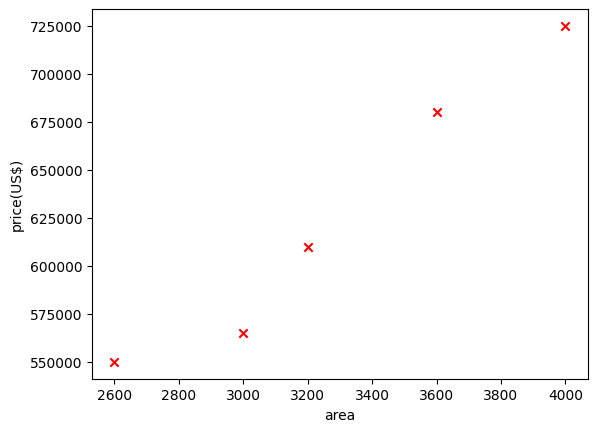

In [5]:
plt.xlabel("area")
plt.ylabel("price(US$)")
plt.scatter(df1.area,df1.price, color = "red", marker = "x")

In [6]:
reg = linear_model.LinearRegression()
reg.fit(df1[["area"]],df1.price)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
reg.predict([[3300]])

c:\Users\acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [8]:
# y=w*x+b

#w:
print(reg.coef_)

#b:
print(reg.intercept_)

[135.78767123]
180616.43835616432


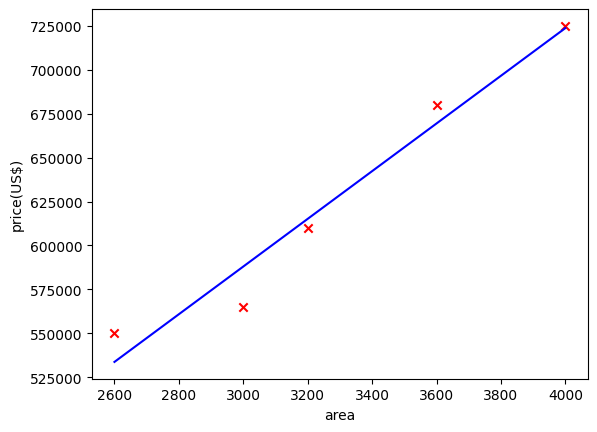

In [9]:
plt.xlabel("area")
plt.ylabel("price(US$)")
plt.scatter(df1.area, df1.price, color="red", marker="x")

# regression line
plt.plot(df1.area, reg.predict(df1[["area"]]), color="blue")
# plt.plot(x, y)
# x -> area -> df.area
# y -> predicted values for the value of area -> reg.predict(df[["area"]])

plt.show()


# Linear Regression with Miltiple Variable

In [10]:
df2 = pd.read_csv("df2_homeprices.csv")
df2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [11]:
median_bedrooms = df2.bedrooms.median()
print(median_bedrooms); print()


# but we want int value
import math
median_bedrooms = math.floor(median_bedrooms)
print(median_bedrooms); print()


#inserting the value in dataframe
df2.bedrooms = df2.bedrooms.fillna(median_bedrooms)
print(df2)

3.5

3

   area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       3.0   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000


In [12]:
reg = linear_model.LinearRegression()
reg.fit(df2[["area", "bedrooms", "age"]], df2.price)
# ref.fit(df[["x1", "x2", "x3"]], df.y)
# this will make a model and choose the suitable value of parameters (w's and b {weights and bias})


# weights:
print(reg.coef_)

# bias
print(reg.intercept_)

[   137.25 -26025.    -6825.  ]
383724.9999999998


In [13]:
print(reg.predict([[3000, 3, 40]]))
print(reg.predict([[2599,4,5]]))

[444400.]
[602212.75]


c:\Users\acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Code for Linear Regression with Miltiple Variablewith with predicted price and actual price graph 

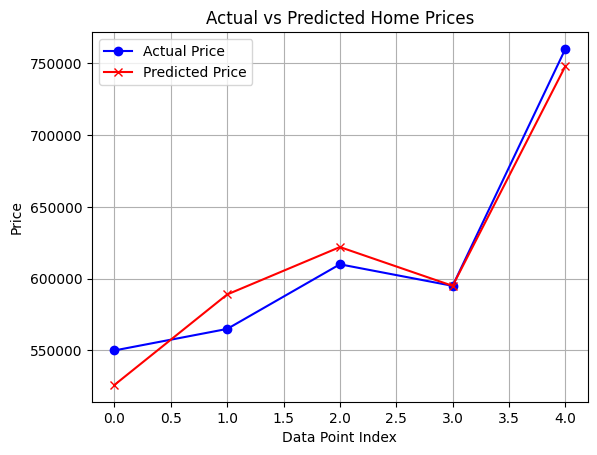

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math

# Load and clean data
df2 = pd.read_csv("df2_homeprices.csv")
median_bedrooms = math.floor(df2.bedrooms.median())
df2.bedrooms = df2.bedrooms.fillna(median_bedrooms)

# Train model
reg = LinearRegression()
X = df2[["area", "bedrooms", "age"]]
y = df2.price
reg.fit(X, y)

# Predict prices
predicted = reg.predict(X)

# Plot actual vs predicted
plt.plot(y.values, label="Actual Price", color="blue", marker='o')
plt.plot(predicted, label="Predicted Price", color="red", marker='x')
plt.xlabel("Data Point Index")
plt.ylabel("Price")
plt.title("Actual vs Predicted Home Prices")
plt.legend()
plt.grid(True)
plt.show()


# Gradient Descent and Cost Function

In [17]:
def gradient_descent(x, y):
    w_curr = b_curr = 0
    iterations = 1000
    m = len(x)
    alpha = 0.001

    for i in range(iterations):
        y_predicted = w_curr * x + b_curr
        wd = (2/m) * np.sum((y_predicted - y) * x)
        bd = (2/m) * np.sum(y_predicted - y)
        w_curr = w_curr - alpha * wd
        b_curr = b_curr - alpha * bd

        print("w: {}  b: {}  itr: {}".format(w_curr, b_curr, i))

x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 9, 11, 13])

gradient_descent(x, y)


w: 0.062  b: 0.018000000000000002  itr: 0
w: 0.122528  b: 0.035592000000000006  itr: 1
w: 0.181618832  b: 0.052785648000000004  itr: 2
w: 0.239306503808  b: 0.069590363712  itr: 3
w: 0.29562421854195203  b: 0.086015343961728  itr: 4
w: 0.35060439367025875  b: 0.10206956796255283  itr: 5
w: 0.40427867960173774  b: 0.11776180246460617  itr: 6
w: 0.4566779778357119  b: 0.13310060678206653  itr: 7
w: 0.5078324586826338  b: 0.14809433770148814  itr: 8
w: 0.5577715785654069  b: 0.16275115427398937  itr: 9
w: 0.606524096911324  b: 0.17707902249404894  itr: 10
w: 0.6541180926443106  b: 0.1910857198675929  itr: 11
w: 0.7005809802869303  b: 0.20477883987199186  itr: 12
w: 0.7459395256813859  b: 0.2181657963105263  itr: 13
w: 0.7902198613385323  b: 0.23125382756381693  itr: 14
w: 0.8334475014237017  b: 0.2440500007406581  itr: 15
w: 0.8756473563879363  b: 0.25656121573063456  itr: 16
w: 0.916843747253018  b: 0.2687942091608457  itr: 17
w: 0.9570604195584865  b: 0.2807555582590059  itr: 18
w: 0.99